In [30]:
from matplotlib import pyplot as plt
import json
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import stumpy
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
from collections import Counter
import urllib
import ssl
import io
import os
from kando import kando_client
%run utils.ipynb

In [22]:
RESAMPLE = '15min'
WINDOW = 12
THRESHOLD = 0.05
POINT_ID = 1377

In [3]:
with open('key.json') as f:
    api_login = json.load(f)

url = "https://kando-staging.herokuapp.com"
client = kando_client.client(url, api_login['key'], api_login['secret'])

In [1]:
site_dic = client.get_all(point_id=POINT_ID, start=2016)

NameError: name 'client' is not defined

In [5]:
site_dic

{'has_more': False,
 'fetch_size': 0,
 'last_sampling': None,
 'last_sampling_formated': None,
 'point_id': 1377,
 'point': {'id': 1377,
  'name': 'גיא בן הינום',
  'device': {'unit_id': None, 'wl_installation_height': 0.0},
  'pipe_info': {'channel_shape': 'circular_pipe',
   'diameter': 0.4,
   'pipe_width': 0.0,
   'pipe_slope': 0.0,
   'pipe_friction': 0.0125634},
  'group': {'name': 'גיא בן הינום',
   'type': 'groups/collectors',
   'water_consumption': 0.0,
   'percentage_water_in_sewage': 70.0,
   'background_water_ec': None,
   'water_authority': {'id': 24, 'name': 'הגיחון'},
   'sector': {'id': 39, 'name': 'Industrial Main Collector**'}},
  'time_zone': 'Asia/Jerusalem',
  'latitude': 31.7696555,
  'longitude': 35.2269088},
 'samplings': {'1492657500': {'DateTime': 1492657500,
   'PI': 0.0,
   'EC': 0,
   'PH': 7.0,
   'WL': 0,
   'ORP': -7,
   'TEMPERATURE': 16},
  '1492657800': {'DateTime': 1492657800,
   'PI': 0.0,
   'EC': 0,
   'PH': 7.0,
   'WL': 0,
   'ORP': -7,
   'TEM

In [6]:
df = pd.DataFrame.from_dict(site_dic['samplings'], orient='index')

In [7]:
df.visit.fillna(value=False, inplace = True)
df.Battery.fillna(value=0, inplace = True)
df.Signal.fillna(value=0, inplace = True)

In [8]:
df['DateTime'] = pd.to_datetime(df['DateTime'], unit='s')
df = df.set_index('DateTime')
df.drop(df.index[0], inplace=True)

In [9]:
df.head(3)

PI   EC   PH   WL  ORP  TEMPERATURE  visit  Battery  \
DateTime                                                                    
2017-04-20 03:10:00  0.0  0.0  7.0  0.0 -7.0         16.0  False      0.0   
2017-04-20 03:15:00  0.0  0.0  7.0  0.0 -7.0         16.0  False      0.0   
2017-04-20 03:20:00  0.0  0.0  7.0  0.0 -7.0         16.0  False      0.0   

                     Signal  
DateTime                     
2017-04-20 03:10:00     0.0  
2017-04-20 03:15:00     0.0  
2017-04-20 03:20:00     0.0

In [74]:
df.WL.nunique()

1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37694 entries, 2017-04-20 03:10:00 to 2017-09-04 22:55:00
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PI           37694 non-null  float64
 1   EC           33295 non-null  float64
 2   PH           33645 non-null  float64
 3   WL           37686 non-null  float64
 4   ORP          33645 non-null  float64
 5   TEMPERATURE  33643 non-null  float64
 6   visit        37694 non-null  bool   
 7   Battery      37694 non-null  float64
 8   Signal       37694 non-null  float64
dtypes: bool(1), float64(8)
memory usage: 2.6 MB


In [11]:
cols_to_plot = ['PI', 'EC', 'PH', 'ORP', 'TEMPERATURE']

Plotting on a full time-line (with optional resampling)

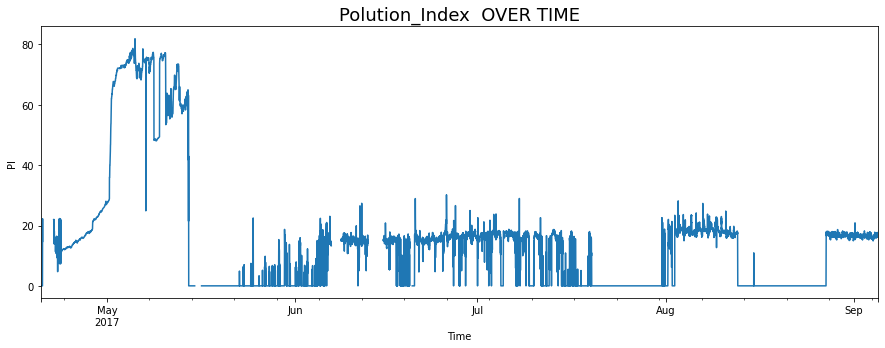

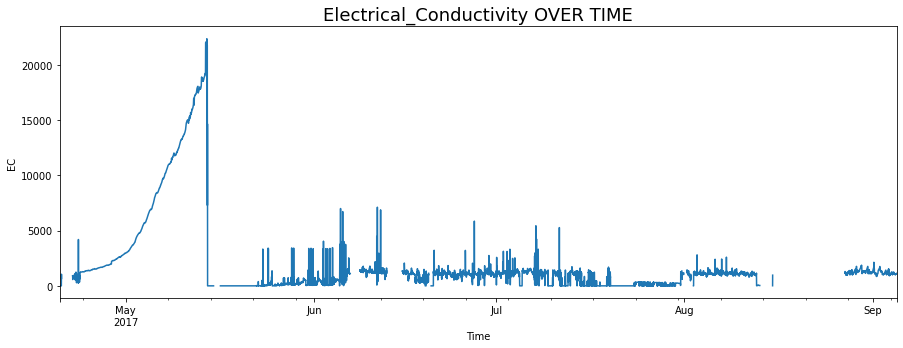

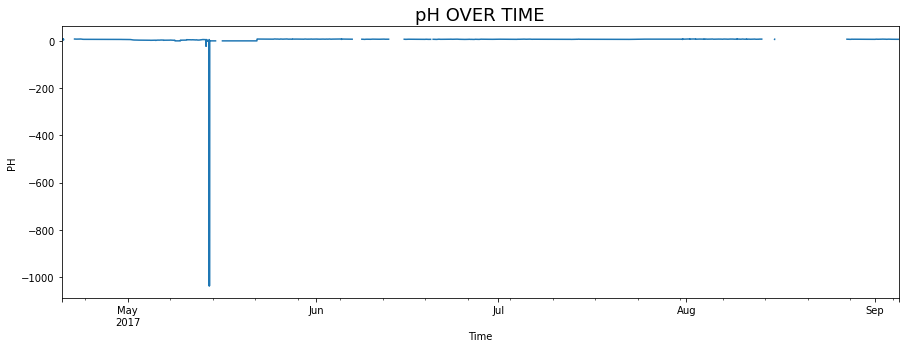

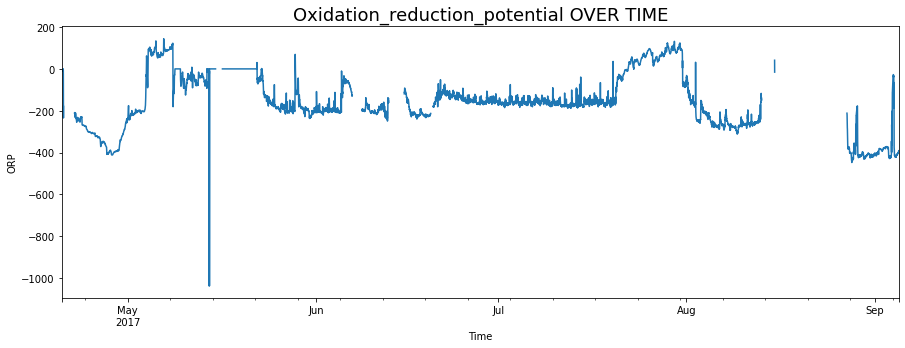

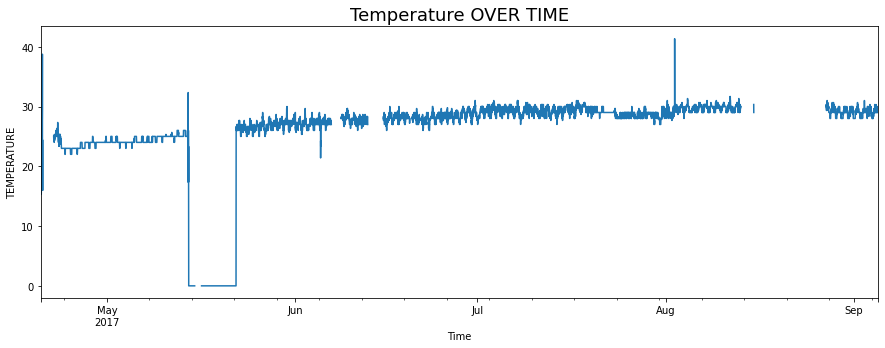

In [12]:
plot_columns(df, cols_to_plot, RESAMPLE)

Resampling the data, imputing nulls with time_interpolations and plotting

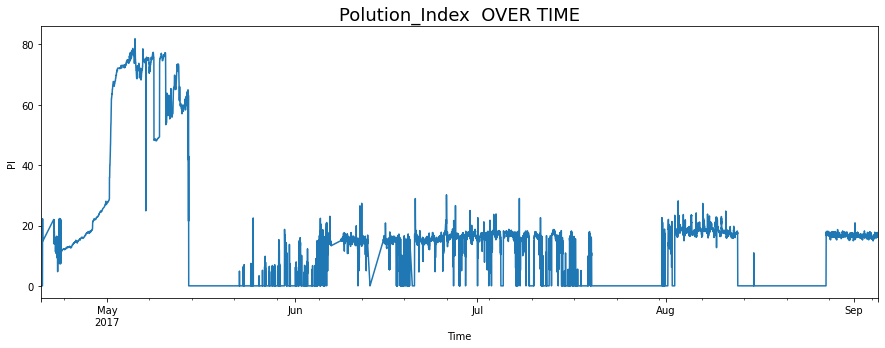

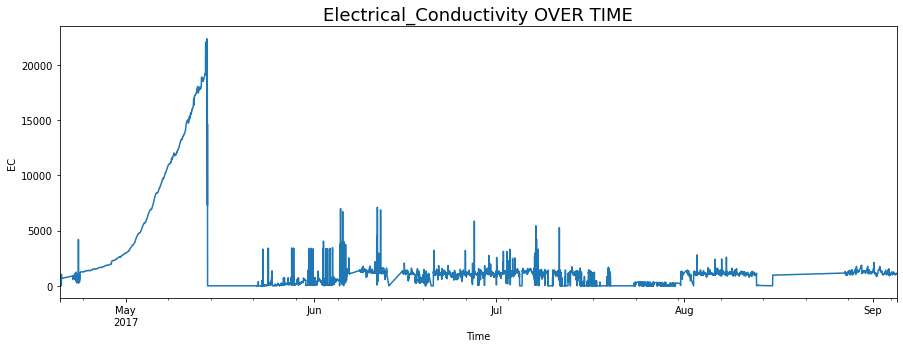

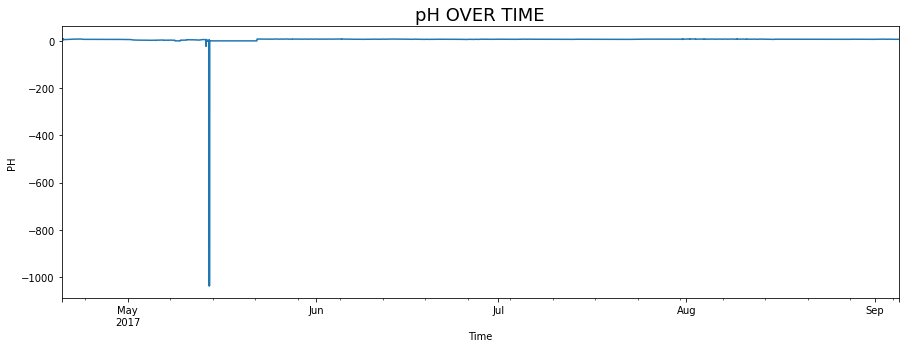

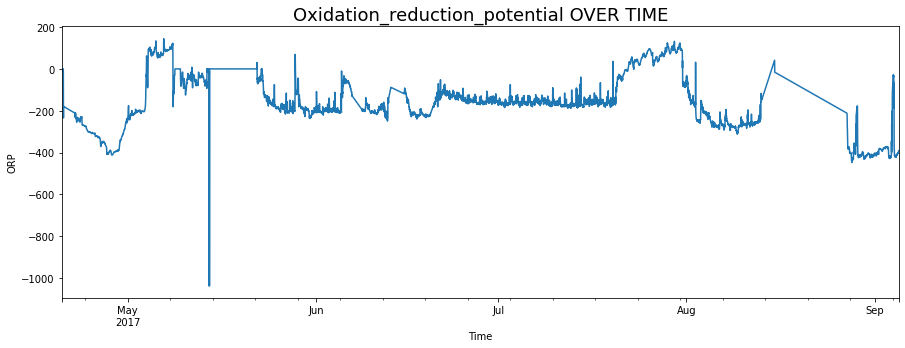

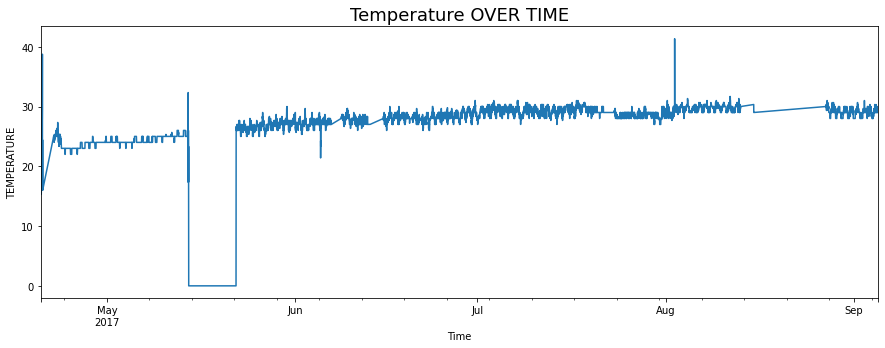

In [13]:
df = impute_nulls_with_time_interpolation(df, cols_to_plot, RESAMPLE)
plot_columns(df, cols_to_plot, RESAMPLE)

In [14]:
cols_for_matrix_profile = ['EC', 'PH', 'ORP', 'TEMPERATURE']
mps = create_matrix_profile_dictionary(df, cols_for_matrix_profile, m=WINDOW)

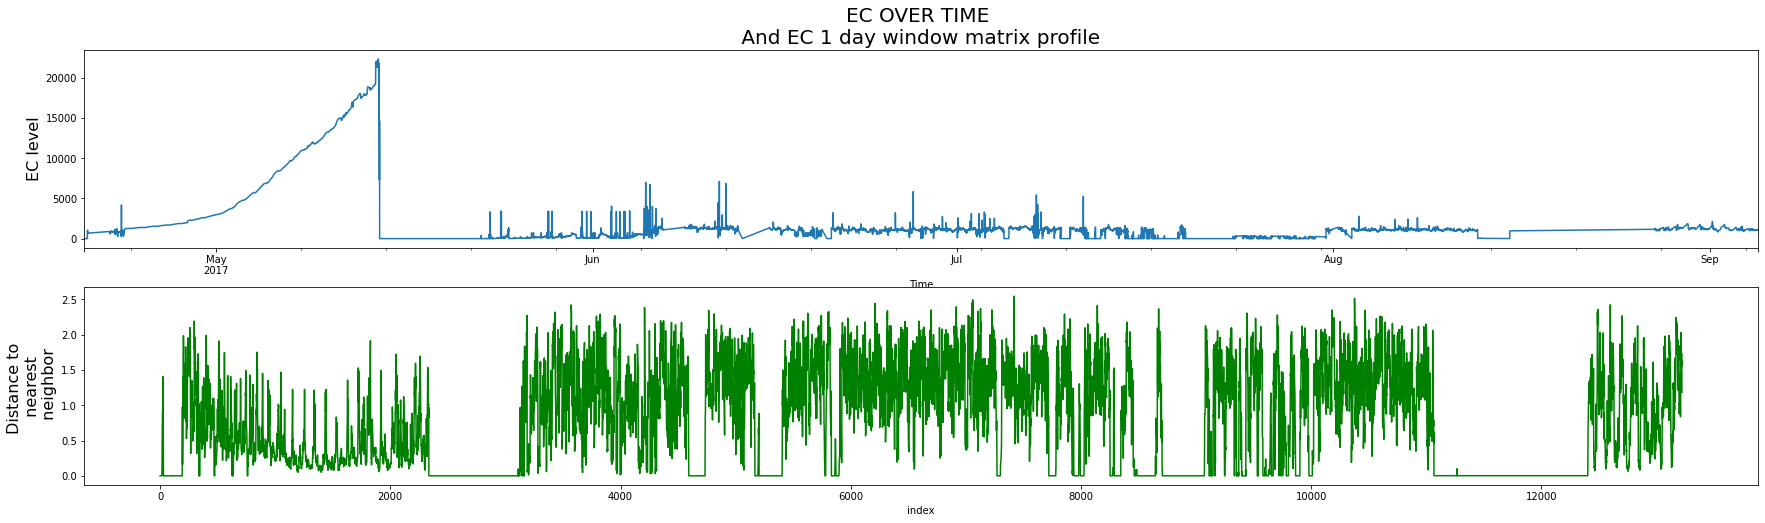

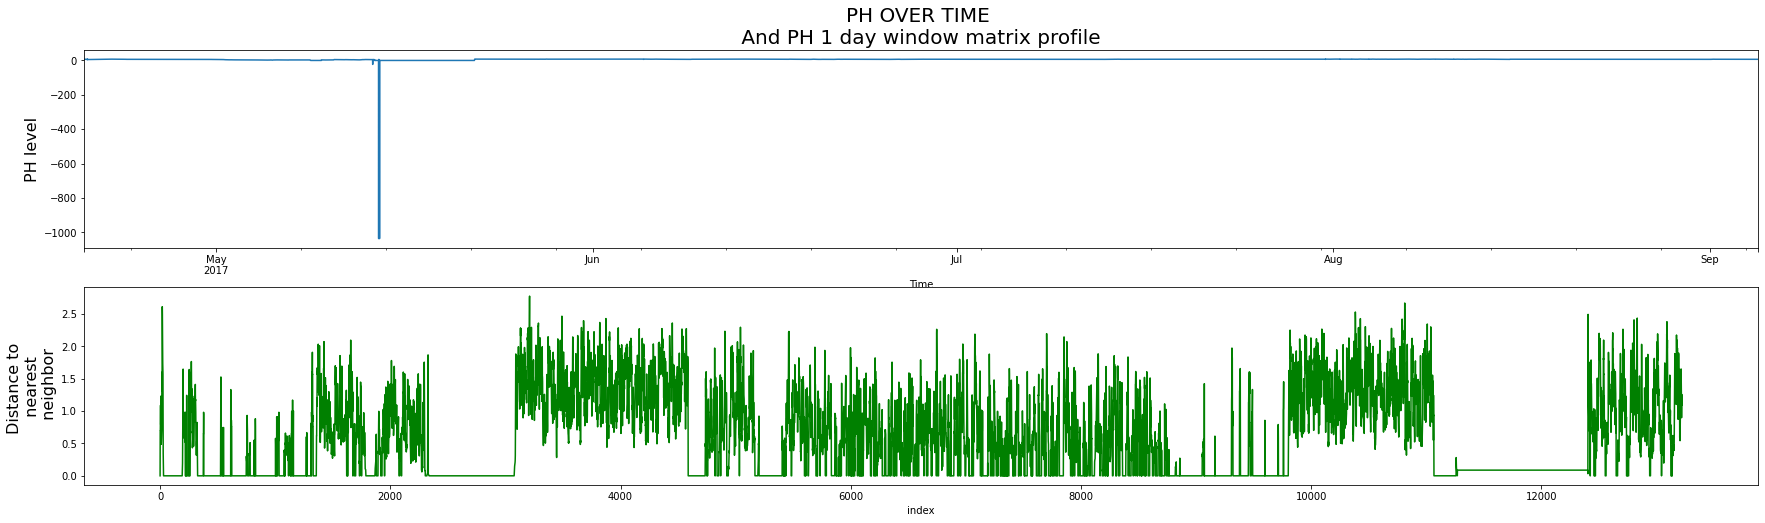

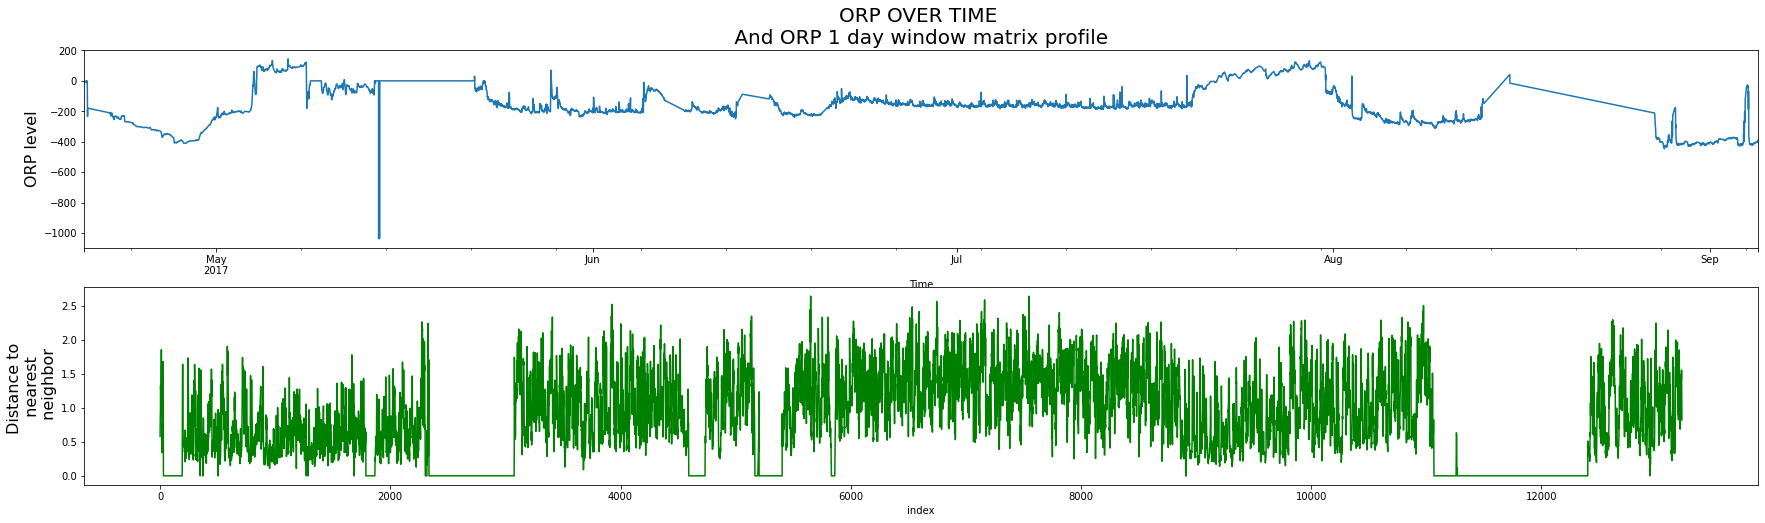

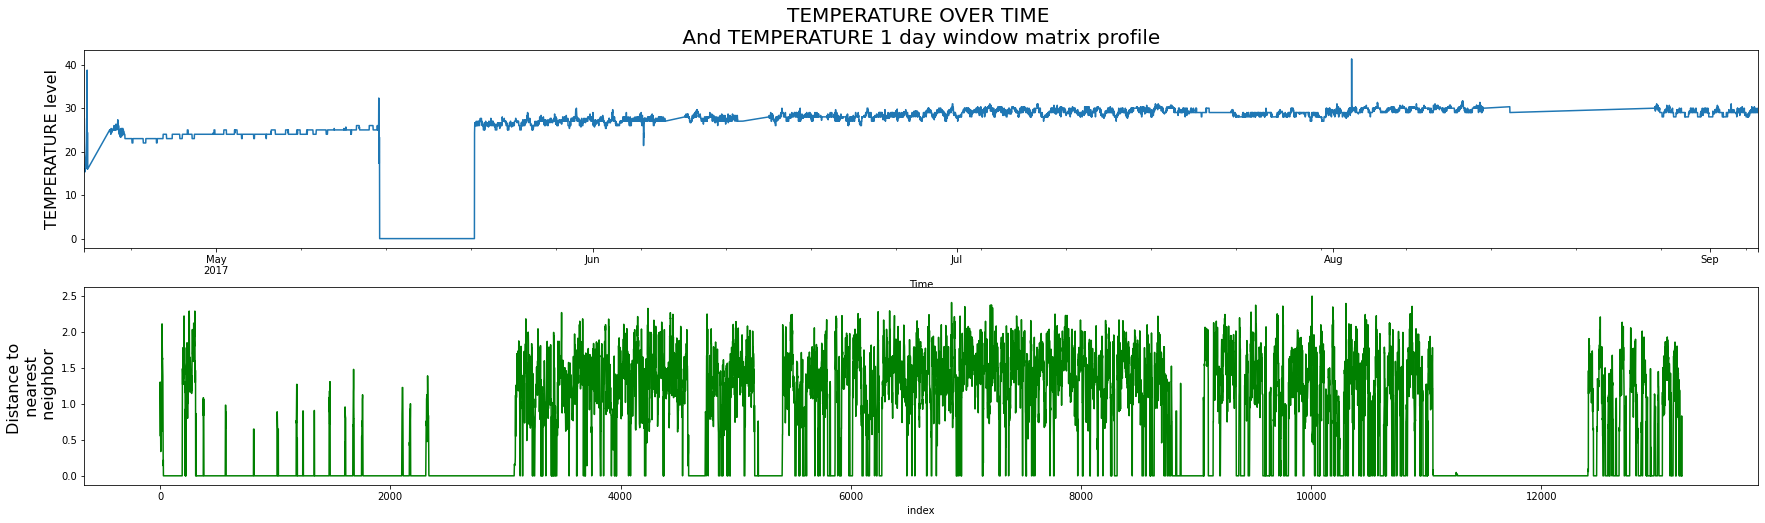

In [15]:
plot_univariant_matrix_profiles_dictionary(df, mps, cols_for_matrix_profile)

In [16]:
%run utils.ipynb

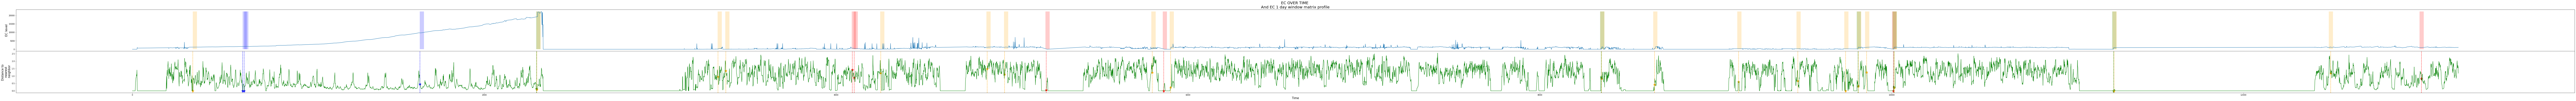

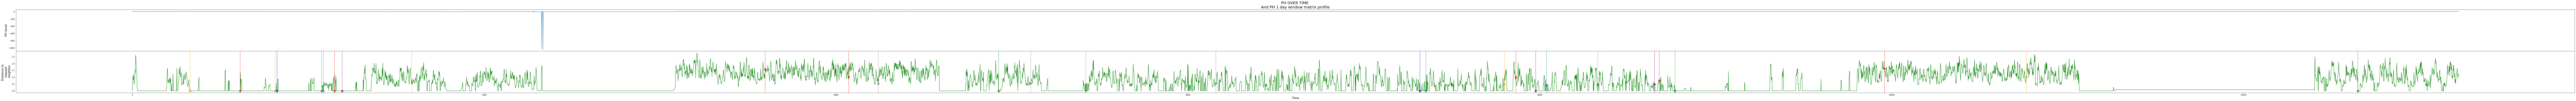

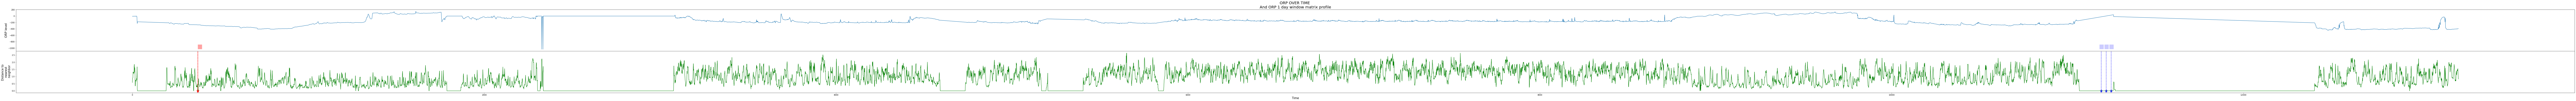

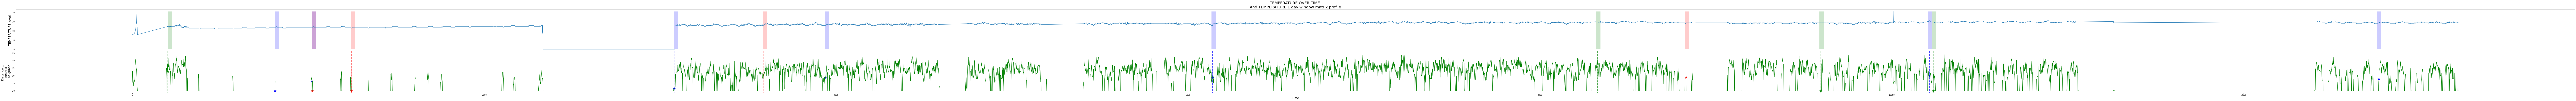

In [17]:
plot_univariant_matrix_profiles_and_motifs(df, mps, cols_for_matrix_profile, threshold=0.02)

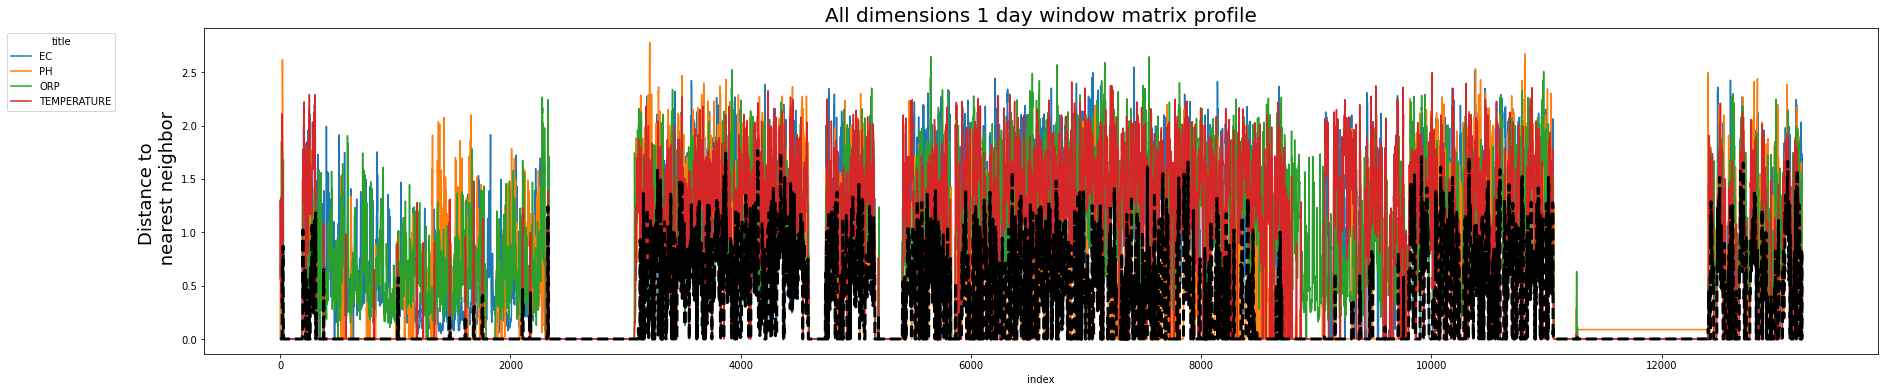

In [18]:
plot_multi_variant_matrix_profile(mps, cols_for_matrix_profile)

In [19]:
cols_for_matrix_profile = ['EC', 'PH', 'ORP', 'TEMPERATURE']

In [50]:
%run utils.ipynb

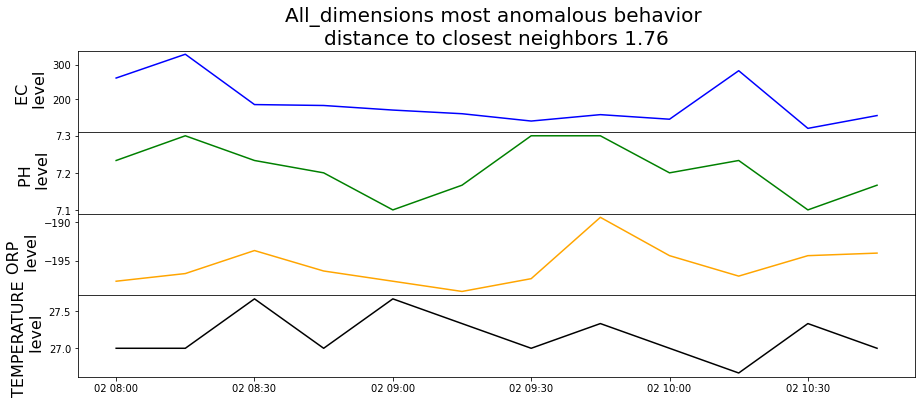

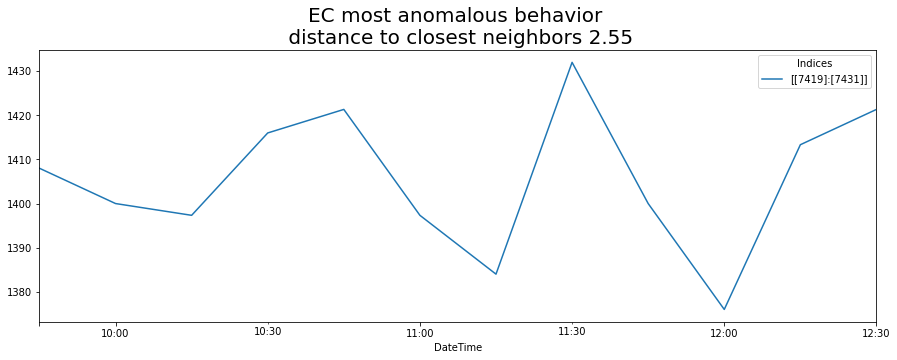

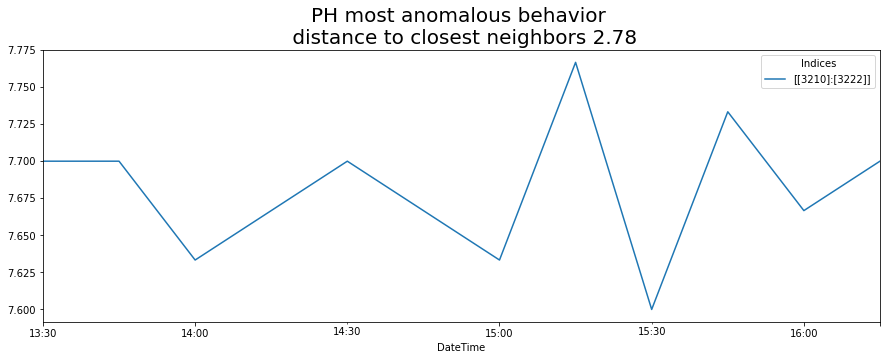

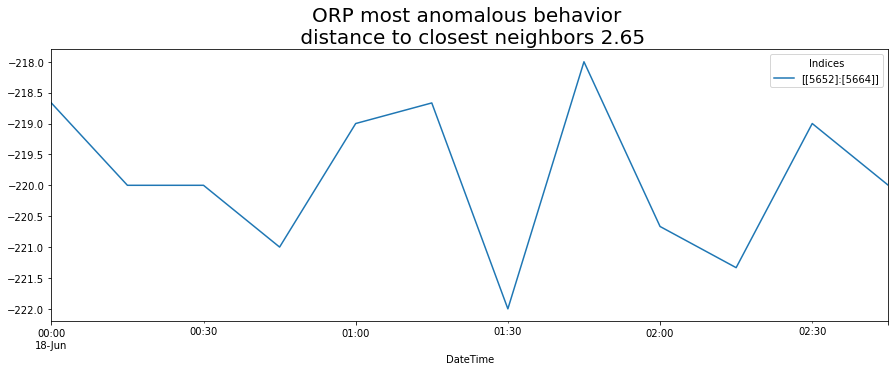

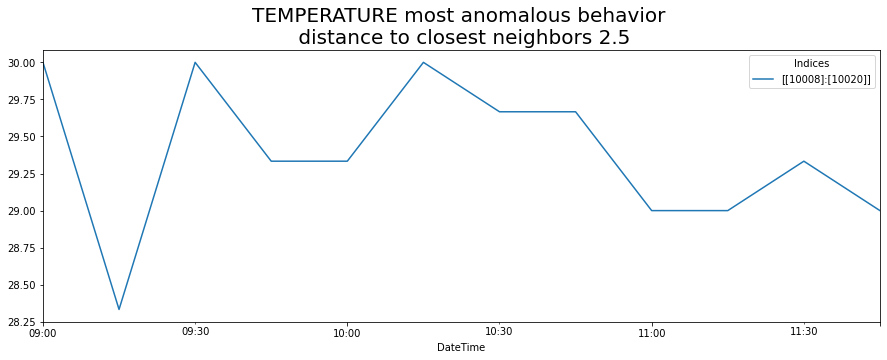

In [51]:
plot_anomalities(df, mps, cols_for_matrix_profile, WINDOW)

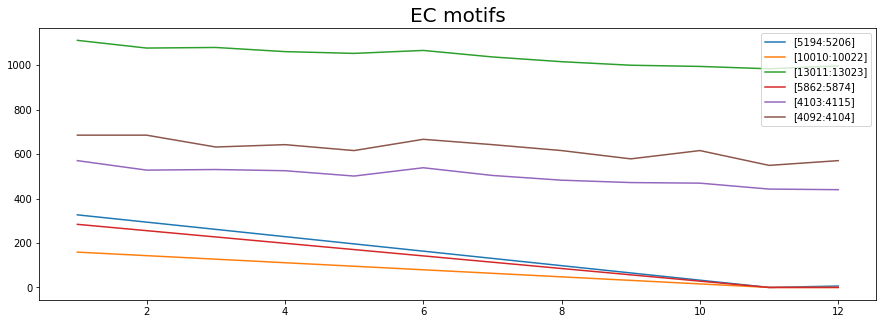

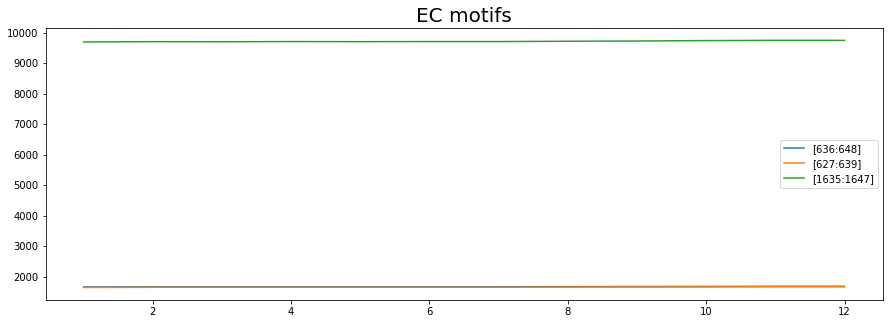

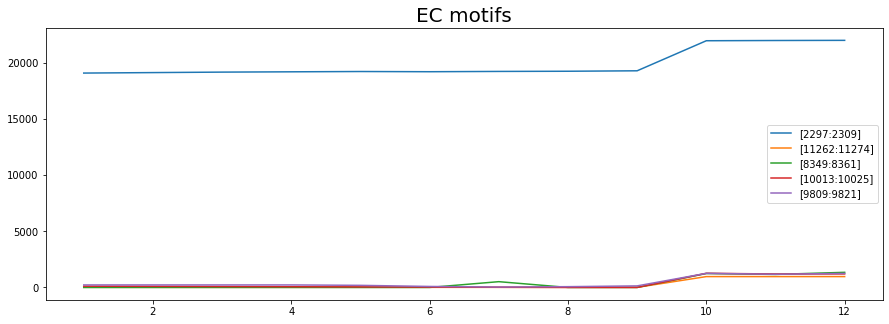

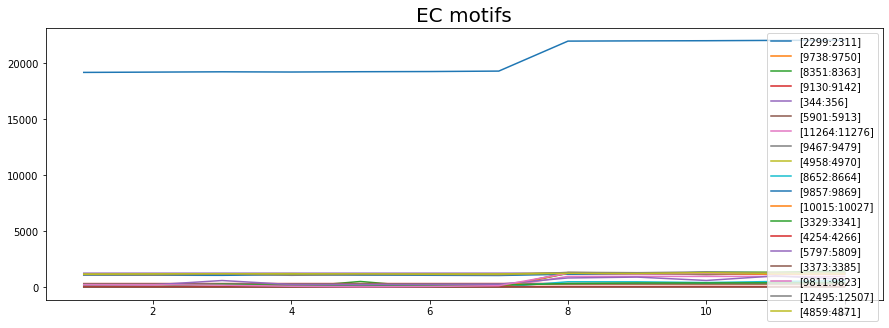

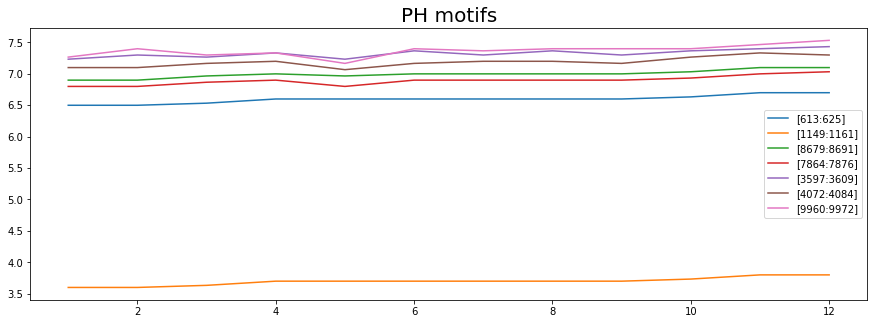

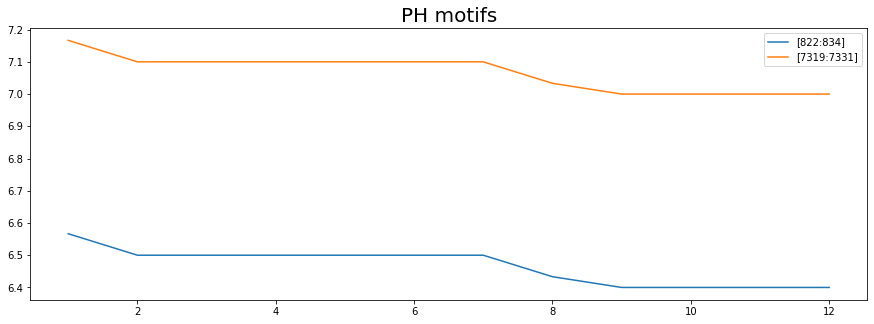

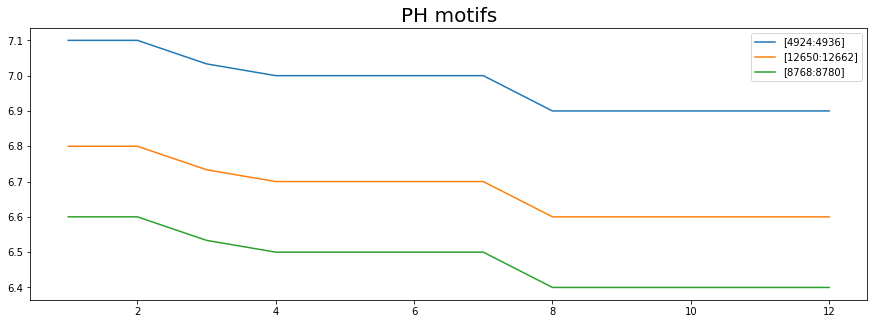

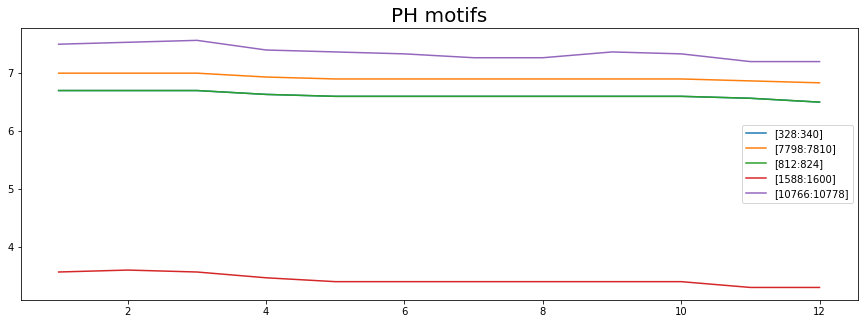

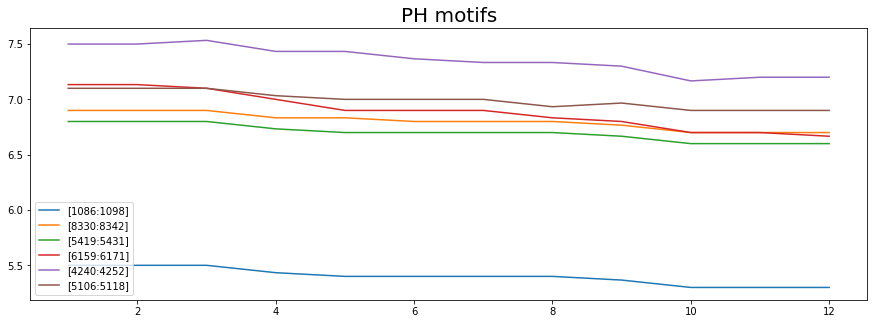

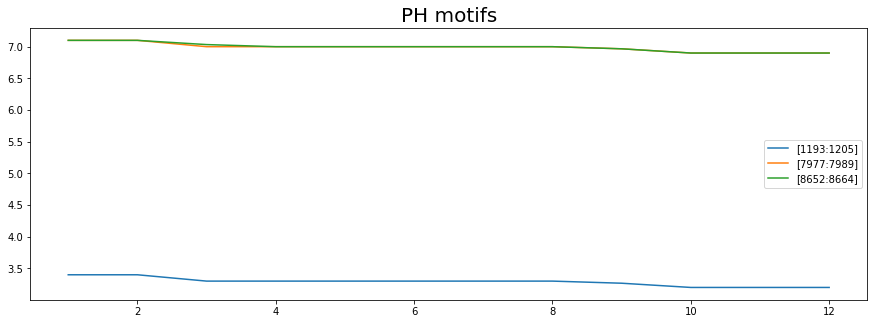

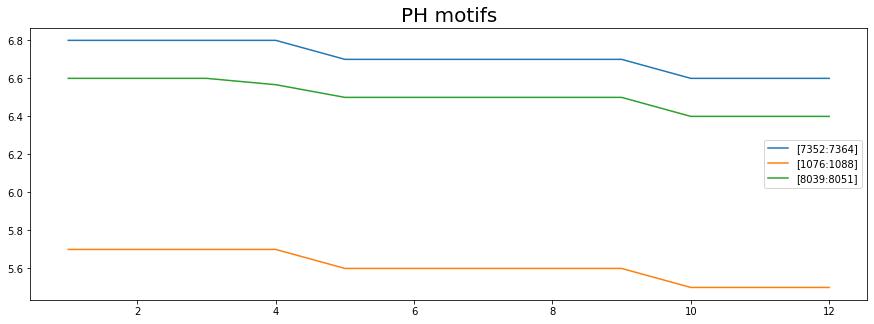

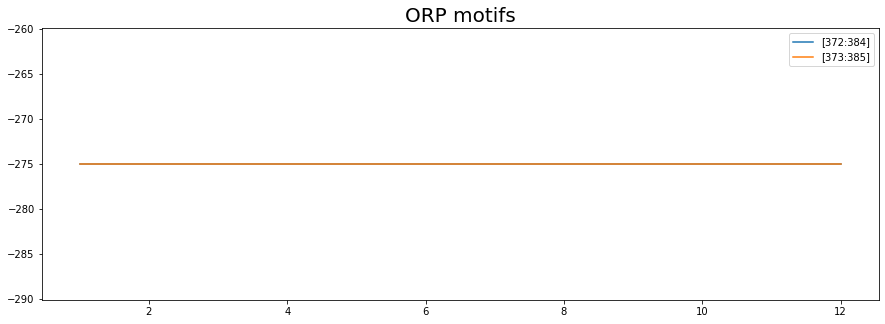

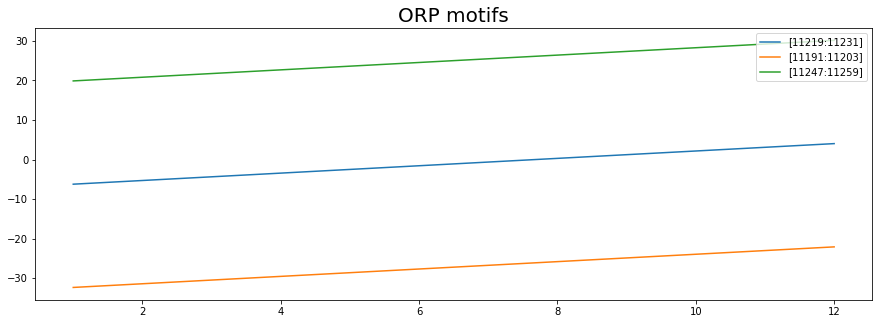

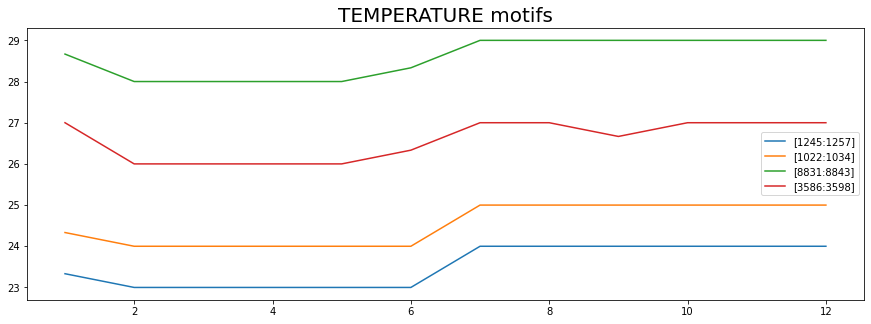

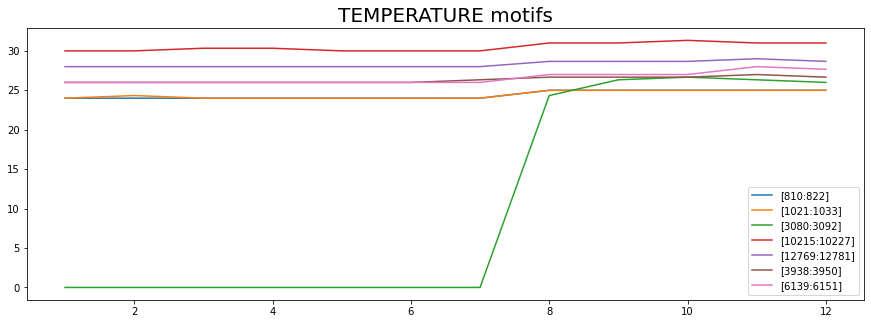

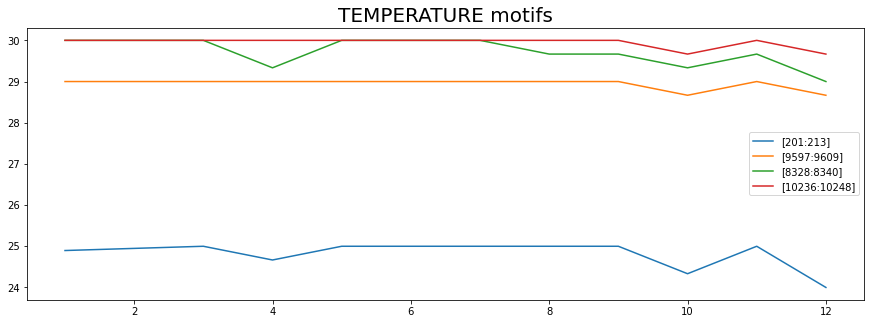

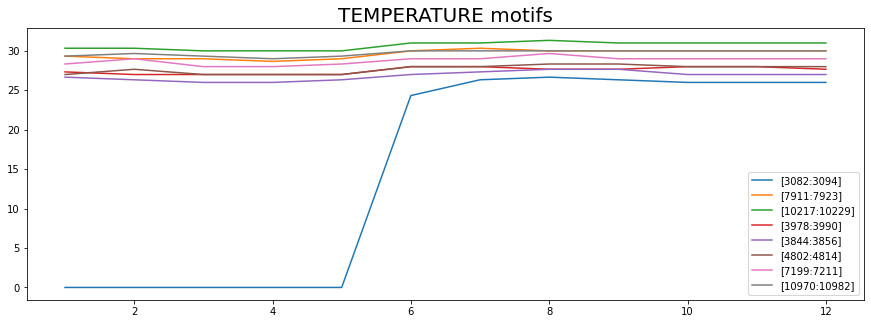

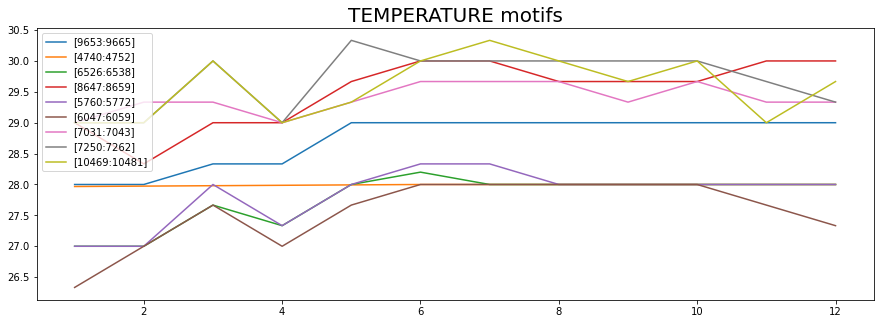

In [23]:
for col in cols_for_matrix_profile:
    groups = discover_motifs_groups(mps[f'mp_{col}'], THRESHOLD)
    plot_groups(df, groups, f'{col}', WINDOW)